### Importing necessary libraries

In [65]:
# Import the required packages

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

### Load and Review the Data

In [66]:
# load the dataset
df = pd.read_csv('E:\Imarticus\Machine Learning\Supervised Learning\logistic regression\Vaccine Usage Prediction\Dataset\h1n1_vaccine_prediction.csv')
df.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


### EDA

In [67]:
# Exploring the data

df.shape

(26707, 34)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [69]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [70]:
#no of categorical columns
cat_cols = list(df.select_dtypes(include = ['object']))
print('Cat_cols = ', cat_cols)
print("no_of_categorical columns",len(cat_cols))

Cat_cols =  ['age_bracket', 'qualification', 'race', 'sex', 'income_level', 'marital_status', 'housing_status', 'employment', 'census_msa']
no_of_categorical columns 9
num_cols =  ['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children', 'h1n1_vaccine']
no_of_numerical columns 25


In [71]:
# no of numerical columns
num_cols = list(df.select_dtypes(exclude = ['object']))
print('num_cols = ', num_cols)
print("no_of_numerical columns",len(num_cols))

num_cols =  ['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children', 'h1n1_vaccine']
no_of_numerical columns 25


In [38]:
df.drop('unique_id', axis = 1, inplace = True)

In [39]:
# checking for missing values

df.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

<AxesSubplot:>

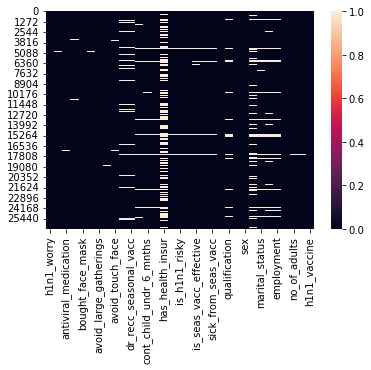

In [40]:
sns.heatmap(df.isnull())

In [52]:
# filling missing values

for col in df.columns:
    if df[col].isnull().sum() and df[col].dtypes != 'object':
        df[col].loc[(df[col].isnull())] = df[col].median()
for col in df.columns:
    if df[col].isnull().sum() and df[col].dtypes == 'object':
        df[col].loc[(df[col].isnull())] = df[col].mode().max()

<AxesSubplot:>

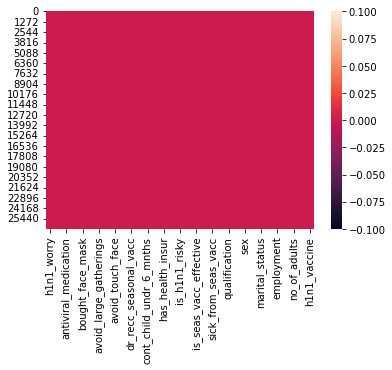

In [63]:
# Again checking for missing values
sns.heatmap(df.isnull())

### Encoding

In [54]:
cat_cols.append('age_bracket')
LE = LabelEncoder()
for col in cat_cols:
    df[col] = LE.fit_transform(df[col])


    
# now again checking for cat vaar

cat = list(df.select_dtypes(include = ['object']))
df.sample(10)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
6016,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,0,0,0,0,1,2,1.0,0.0,0
10690,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1.0,0.0,0
20444,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3,1,2,1,1,1,1,0.0,0.0,0
7592,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,3,0,0,0,0,0,2,2.0,3.0,1
230,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,3,0,1,0,0,1,0,1.0,0.0,0
2004,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,1,1,0,0,0,1.0,2.0,0
13495,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3,1,1,1,0,0,1,0.0,0.0,0
23783,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,1,0,0,0,0,0,3.0,3.0,0
17929,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,2,1,0,1,1,1,1,1.0,0.0,1
12734,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,3,0,0,0,0,0,0,1.0,0.0,1


### Train Test data split

In [55]:
X=df.drop(["h1n1_vaccine"],axis=1)
y=df["h1n1_vaccine"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=0)

### Logistic Model

In [57]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [58]:
predictions=model.predict(X_test)

In [59]:
model.score(X_train,y_train)

0.8374344709532471

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8320229626856358

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[5952,  327],
       [1019,  715]], dtype=int64)

<AxesSubplot:>

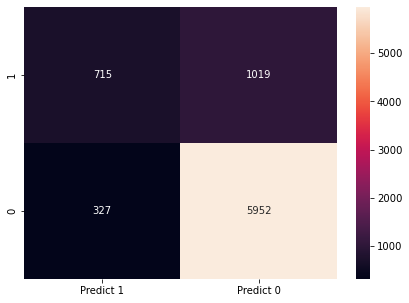

In [62]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')